In [19]:
%cd "/content/drive/MyDrive/Colab Notebooks/FakeNewsDetector"
!ls

/content/drive/MyDrive/Colab Notebooks/FakeNewsDetector
 all_data.xls	 FakeNewsNet.zip	      NN.ipynb
 BERT.ipynb	'Logistic Regression.ipynb'   Preprocess_data.ipynb
 Bi-LSTM.ipynb	 LSTM.ipynb		      unzip_data.ipynb
 FakeNewsNet	'Naive Bayes.ipynb'


In [18]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

In [20]:
df_buzzfake = pd.read_csv("FakeNewsNet/BuzzFeed_fake_news_content.csv")

In [ ]:
df_buzzfake.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


In [21]:
df_polifake = pd.read_csv("FakeNewsNet/PolitiFact_fake_news_content.csv")
df_polifake.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com/2016/09/27/trump-ju...,http://occupydemocrats.com/wp-content/uploads/...,"Brett Bose,Grant Stern,Steve Bernstein,Natalie...",http://occupydemocrats.com,{'$date': 1474934400000},NaN,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,"{""generator"": ""Powered by Visual Composer - dr..."
1,Real_10-Webpage,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,http://rightwingnews.com/wp-content/uploads/20...,NaN,http://rightwingnews.com,{'$date': 1474948336000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/top-news/famous-dog-k...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
2,Real_100-Webpage,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,http://cnn.it/2deaH2d,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,"Tom Lobianco,Deirdre Walsh",http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/17050...,http://www.cnn.com/2016/09/22/politics/bryan-p...,"{""description"": ""Members of the House Oversigh..."
3,Real_101-Webpage,America Just Tragically Lost A Country Music I...,We are absolutely heartbroken to hear about th...,http://newsbake.com/entertainment-news/music-e...,http://newsbake.com/wp-content/uploads/2016/05...,Nancy Wells,http://newsbake.com,{'$date': 1474898600000},https://www.youtube.com/embed/8ozTJcu-_BU,http://0.gravatar.com/avatar/0d702c6042933cd78...,http://newsbake.com/entertainment-news/music-e...,"{""shareaholic"": {""site_name"": ""NewsBake"", ""lan..."
4,Real_102-Webpage,Monuments to the Battle for the New South,"Nine years ago, a driver lost control of his p...",http://politi.co/2dd9U1x,http://static.politico.com/25/ed/85332de14c45b...,"Jack Shafer,Lisa Rab",http://politi.co,{'$date': 1473941820000},NaN,http://static.politico.com/25/ed/85332de14c45b...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""Virginia, increasingly divers..."


In [22]:
#looking at the meta data
# Load and analyze text files
text_files = {
    'politifact_news': 'FakeNewsNet/PolitiFactNews.txt',
    'politifact_user': 'FakeNewsNet/PolitiFactUser.txt',
    'buzzfeed_news': 'FakeNewsNet/BuzzFeedNews.txt',
    'buzzfeed_news_user': 'FakeNewsNet/BuzzFeedNewsUser.txt',
    'buzzfeed_user': 'FakeNewsNet/BuzzFeedUser.txt',
    'politifact_user_user': 'FakeNewsNet/PolitiFactUserUser.txt',
    'buzzfeed_user_user': 'FakeNewsNet/BuzzFeedUserUser.txt',
    'politifact_news_user': 'FakeNewsNet/PolitiFactNewsUser.txt'
}

def analyze_text_files():

    for name, file_path in text_files.items():
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()

            print(f"\n=== {name.upper()} ===")
            print(f"Total lines: {len(lines)}")
            print(f"First 5 lines: {lines[:5]}")

            # Check if it's a relationship file (contains tabs or multiple columns)
            if lines and '\t' in lines[0]:
                print("This appears to be a relationship file (contains tabs)")
                sample_parts = lines[0].strip().split('\t')
                print(f"Number of columns: {len(sample_parts)}")
                print(f"Sample row parts: {sample_parts}")

            print("-" * 50)
        except Exception as e:
            print(f"Error loading {name}: {e}")

analyze_text_files()


=== POLITIFACT_NEWS ===
Total lines: 240
First 5 lines: ['PolitiFact_Real_1\n', 'PolitiFact_Real_2\n', 'PolitiFact_Real_3\n', 'PolitiFact_Real_4\n', 'PolitiFact_Real_5\n']
--------------------------------------------------

=== POLITIFACT_USER ===
Total lines: 23865
First 5 lines: ['f4b46be21c2f553811cc8a73c4f0ff05\n', '2ced3734cc9c164edd9a8f5fbebe976f\n', 'c84c4ea8ba67211f84781bdd64cafe43\n', '1776d1765f5e82cd660d8d502f227402\n', '4e8c2c300d96929895ce0edba915af16\n']
--------------------------------------------------

=== BUZZFEED_NEWS ===
Total lines: 182
First 5 lines: ['BuzzFeed_Real_1\n', 'BuzzFeed_Real_2\n', 'BuzzFeed_Real_3\n', 'BuzzFeed_Real_4\n', 'BuzzFeed_Real_5\n']
--------------------------------------------------

=== BUZZFEED_NEWS_USER ===
Total lines: 22779
First 5 lines: ['45\t1\t1\n', '127\t2\t1\n', '115\t3\t1\n', '180\t3\t1\n', '140\t4\t1\n']
This appears to be a relationship file (contains tabs)
Number of columns: 3
Sample row parts: ['45', '1', '1']
---------------

In [23]:
# Load the datasets
def load_data():
    """Load all the FakeNewsNet dataset files"""

    # Load BuzzFeed data
    try:
        buzzfeed_fake = pd.read_csv('FakeNewsNet/BuzzFeed_fake_news_content.csv')
        buzzfeed_real = pd.read_csv('FakeNewsNet/BuzzFeed_real_news_content.csv')
        print(f"BuzzFeed Fake News: {len(buzzfeed_fake)} articles")
        print(f"BuzzFeed Real News: {len(buzzfeed_real)} articles")
    except Exception as e:
        print(f"Error loading BuzzFeed data: {e}")

    # Load PolitiFact data
    try:
        politifact_fake = pd.read_csv('FakeNewsNet/PolitiFact_fake_news_content.csv')
        politifact_real = pd.read_csv('FakeNewsNet/PolitiFact_real_news_content.csv')
        print(f"PolitiFact Fake News: {len(politifact_fake)} articles")
        print(f"PolitiFact Real News: {len(politifact_real)} articles")
    except Exception as e:
        print(f"Error loading PolitiFact data: {e}")

    return buzzfeed_fake, buzzfeed_real, politifact_fake, politifact_real

# Load all datasets
buzzfeed_fake, buzzfeed_real, politifact_fake, politifact_real = load_data()

BuzzFeed Fake News: 91 articles
BuzzFeed Real News: 91 articles
PolitiFact Fake News: 120 articles
PolitiFact Real News: 120 articles


In [24]:
def preprocess_data(fake_df, real_df, source_name):
    """Preprocess and combine fake and real news data"""

    # Add labels
    fake_df = fake_df.copy()
    real_df = real_df.copy()

    fake_df['label'] = 0  # Fake news
    real_df['label'] = 1  # Real news
    fake_df['source_type'] = source_name
    real_df['source_type'] = source_name

    # Combine datasets
    combined_df = pd.concat([fake_df, real_df], ignore_index=True)

    # Basic cleaning
    if 'title' in combined_df.columns:
        combined_df['title'] = combined_df['title'].fillna('')
    if 'text' in combined_df.columns:
        combined_df['text'] = combined_df['text'].fillna('')

    print(f"\n{source_name} Dataset Overview:")
    print(f"Total articles: {len(combined_df)}")
    print(f"Fake news: {len(fake_df)} ({len(fake_df)/len(combined_df)*100:.1f}%)")
    print(f"Real news: {len(real_df)} ({len(real_df)/len(combined_df)*100:.1f}%)")

    return combined_df

# Preprocess both datasets
buzzfeed_combined = preprocess_data(buzzfeed_fake, buzzfeed_real, 'BuzzFeed')
politifact_combined = preprocess_data(politifact_fake, politifact_real, 'PolitiFact')

# Combine all data
all_data = pd.concat([buzzfeed_combined, politifact_combined], ignore_index=True)
print(f"\nCombined Dataset: {len(all_data)} total articles")


BuzzFeed Dataset Overview:
Total articles: 182
Fake news: 91 (50.0%)
Real news: 91 (50.0%)

PolitiFact Dataset Overview:
Total articles: 240
Fake news: 120 (50.0%)
Real news: 120 (50.0%)

Combined Dataset: 422 total articles


In [25]:
all_data['label'].isnull().sum()

np.int64(0)

In [26]:
## EDA

In [27]:
#basic statistics
def dataset_overview():
    """ Provide comprehension dataset overview"""

    print("===FAKENEWSNET DATASET ANALYSIS ===\n")

    #overall statistics
    print("Dataset Overview: ")
    print(f"Total articles: {len(all_data):,}")
    print(f"Sources: {all_data['source_type'].nunique()}")
    print(f"Fake news: {sum(all_data['label'] == 0):,} ({sum(all_data['label'] == 0)/len(all_data)*100:.1f}%)")
    print(f"Real news: {sum(all_data['label'] == 1):,} ({sum(all_data['label'] == 1)/len(all_data)*100:.1f}%)")

    # missing value analysis
    print(f"\n Data Quality:")
    missing_data = all_data.isnull().sum()
    for col, missing in missing_data.items():
          if missing > 0:
              print(f"{col} : {missing:,} missing ({missing/len(all_data)*100:.1f}%)")
    print(f"\nColumns available: {list(all_data.columns)}")

dataset_overview()

===FAKENEWSNET DATASET ANALYSIS ===

Dataset Overview: 
Total articles: 422
Sources: 2
Fake news: 211 (50.0%)
Real news: 211 (50.0%)

 Data Quality:
url : 12 missing (2.8%)
top_img : 14 missing (3.3%)
authors : 67 missing (15.9%)
source : 12 missing (2.8%)
publish_date : 127 missing (30.1%)
movies : 383 missing (90.8%)
images : 14 missing (3.3%)
canonical_link : 22 missing (5.2%)

Columns available: ['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data', 'label', 'source_type']


In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# new libraries added later --> to see .mat files
import scipy.io
import json
from scipy.sparse import coo_matrix
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import pandas as pd

Visualisations

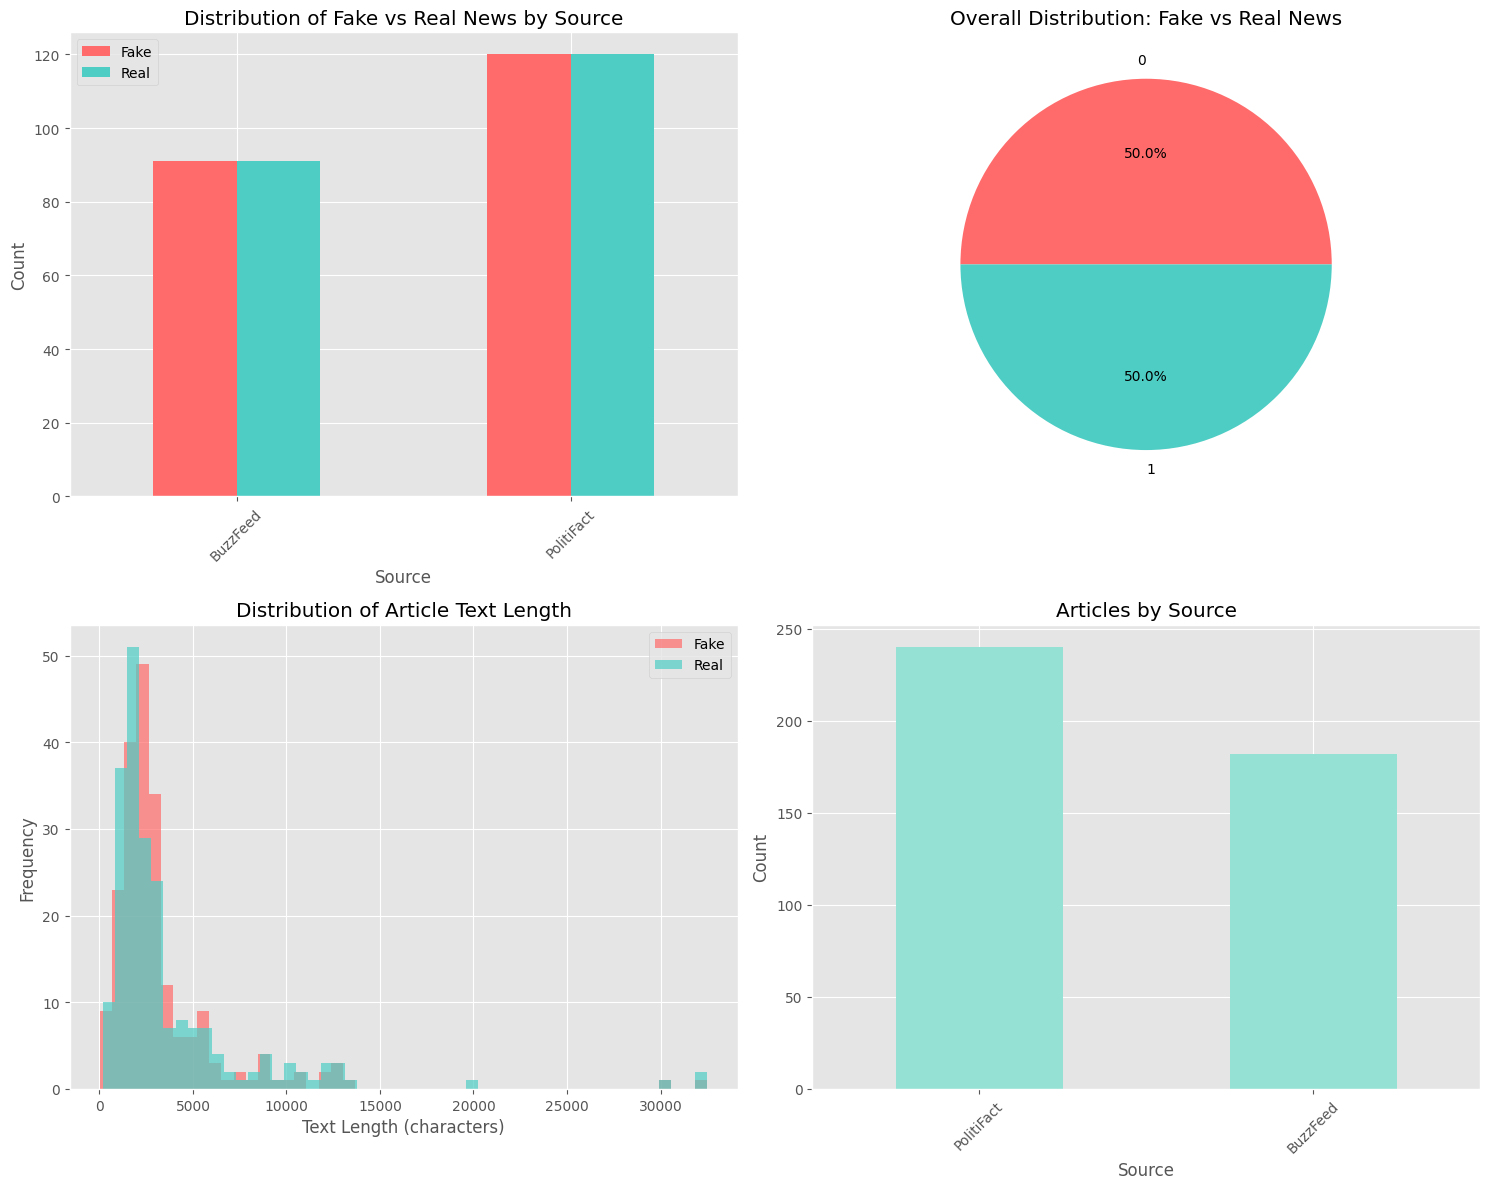

In [29]:
import numpy as np


# Create visualizations
def create_visualizations():
    """Create comprehensive visualizations"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

       # 1. Distribution by source and label
    label_source = pd.crosstab(all_data['source_type'], all_data['label'])
    label_source.plot(kind='bar', ax=axes[0,0], color=['#FF6B6B', '#4ECDC4'])
    axes[0,0].set_title('Distribution of Fake vs Real News by Source')
    axes[0,0].set_xlabel('Source')
    axes[0,0].set_ylabel('Count')
    axes[0,0].legend(['Fake', 'Real'])
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Overall distribution
    all_data['label'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%',
                                         colors=['#FF6B6B', '#4ECDC4'])
    axes[0,1].set_title('Overall Distribution: Fake vs Real News')
    axes[0,1].set_ylabel('')

    # 3. Text length analysis (if text column exists)
    if 'text' in all_data.columns:
        all_data['text_length'] = all_data['text'].str.len()
        fake_lengths = all_data[all_data['label'] == 0]['text_length']
        real_lengths = all_data[all_data['label'] == 1]['text_length']

        axes[1,0].hist(fake_lengths.dropna(), alpha=0.7, label='Fake', bins=50, color='#FF6B6B')
        axes[1,0].hist(real_lengths.dropna(), alpha=0.7, label='Real', bins=50, color='#4ECDC4')
        axes[1,0].set_title('Distribution of Article Text Length')
        axes[1,0].set_xlabel('Text Length (characters)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()

    # 4. Source comparison
    source_counts = all_data['source_type'].value_counts()
    source_counts.plot(kind='bar', ax=axes[1,1], color='#95E1D3')
    axes[1,1].set_title('Articles by Source')
    axes[1,1].set_xlabel('Source')
    axes[1,1].set_ylabel('Count')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


create_visualizations()

text analysis

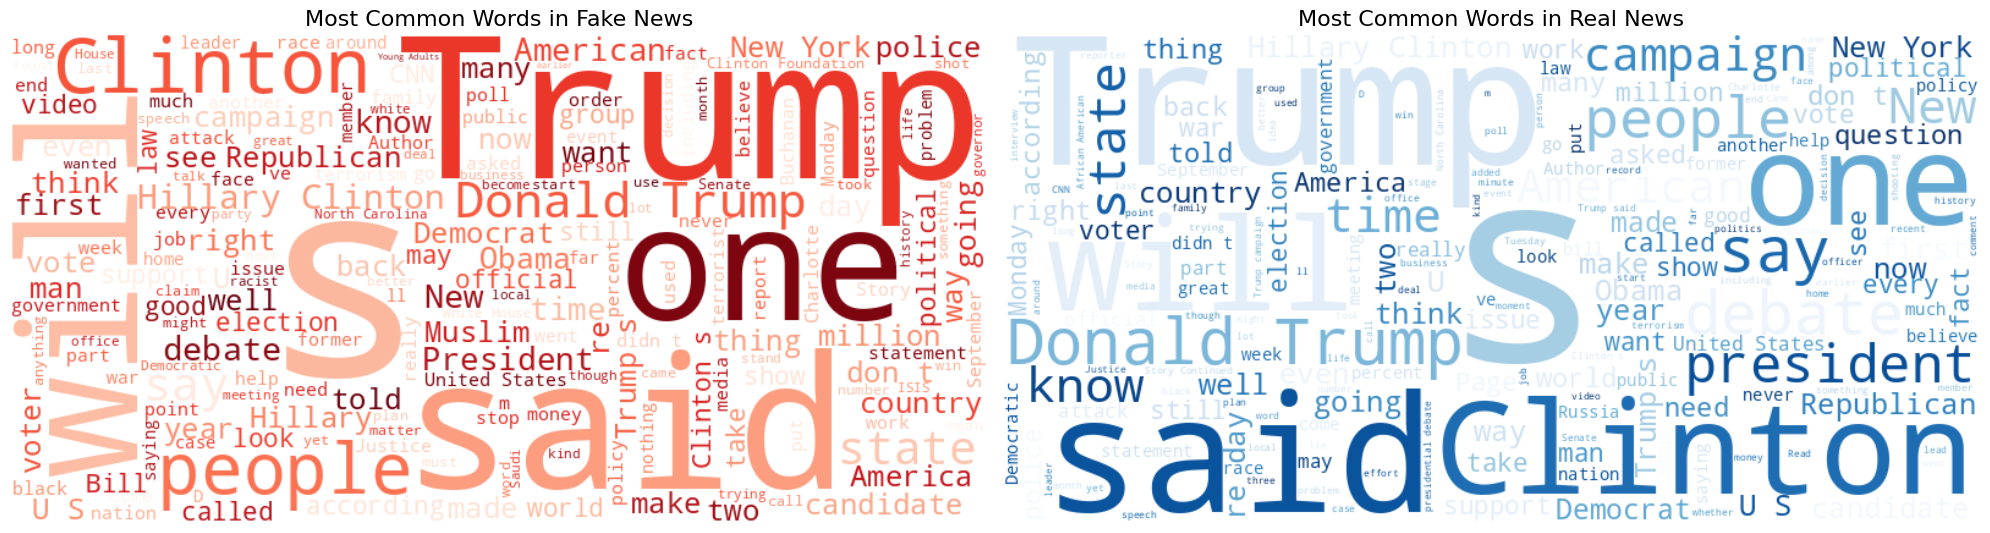

In [30]:
def text_analysis():
    """Perform text analysis and create word clouds"""

    # Combine text fields if available
    text_columns = ['title', 'text', 'content']  # Adjust based on your dataset columns
    available_text_cols = [col for col in text_columns if col in all_data.columns]

    if available_text_cols:
        # Create combined text
        all_data['combined_text'] = all_data[available_text_cols].fillna('').agg(' '.join, axis=1)

        # Separate fake and real news text
        fake_text = ' '.join(all_data[all_data['label'] == 0]['combined_text'].dropna())
        real_text = ' '.join(all_data[all_data['label'] == 1]['combined_text'].dropna())

        # Create word clouds
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Fake news word cloud
        if fake_text:
            fake_wordcloud = WordCloud(width=800, height=400,
                                     background_color='white',
                                     colormap='Reds').generate(fake_text)
            axes[0].imshow(fake_wordcloud, interpolation='bilinear')
            axes[0].set_title('Most Common Words in Fake News', fontsize=16)
            axes[0].axis('off')

         # Real news word cloud
        if real_text:
            real_wordcloud = WordCloud(width=800, height=400,
                                     background_color='white',
                                     colormap='Blues').generate(real_text)
            axes[1].imshow(real_wordcloud, interpolation='bilinear')
            axes[1].set_title('Most Common Words in Real News', fontsize=16)
            axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        return fake_text, real_text
    else:
        print("No text columns found for analysis")
        return None, None

fake_text, real_text = text_analysis()


In [ ]:
all_data.to_csv('all_data.csv')

In [33]:
%cd "/content/drive/MyDrive/Colab Notebooks/FakeNewsDetector"

/content/drive/MyDrive/Colab Notebooks/FakeNewsDetector


In [41]:
!git add .gitignore
!git commit -m "Add gitignore for data"

[main (root-commit) 9d11bf2] Add gitignore for data
 1 file changed, 2 insertions(+)
 create mode 100644 .gitignore


In [40]:
!git config --list

filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
filter.lfs.clean=git-lfs clean -- %f
user.name=saamm
user.email=soumyasinha161093@gmail.com
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/saamm/FakeNewsDetector.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*


In [42]:
!git add .
!git commit -m "Adding data"
!git push -u origin main --force

[main 825bc7d] Adding data
 9 files changed, 211639 insertions(+)
 create mode 100644 BERT.ipynb
 create mode 100644 Bi-LSTM.ipynb
 create mode 100644 LSTM.ipynb
 create mode 100644 Logistic Regression.ipynb
 create mode 100644 NN.ipynb
 create mode 100644 Naive Bayes.ipynb
 create mode 100644 Preprocess_data.ipynb
 create mode 100644 all_data.xls
 create mode 100644 unzip_data.ipynb
fatal: could not read Username for 'https://github.com': No such device or address


In [56]:
!git push https://$GITHUB_TOKEN@github.com/saamm/FakeNewsDetector.git

To https://github.com/saamm/FakeNewsDetector.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/saamm/FakeNewsDetector.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [57]:
!git reset --soft HEAD~1

In [51]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocess_data.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [52]:
!git add .
!git commit -m "Preprocess data, EDA, visualisation"

[main c52ea78] Preprocess data, EDA, visualisation
 1 file changed, 1 insertion(+), 1 deletion(-)


In [55]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocess_data.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
